In [247]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from braindecode.models import EEGConformer
import pandas as pd
from collections import OrderedDict
import math
import importlib
import Spatial_attention_model
importlib.reload(Spatial_attention_model)
from Spatial_attention_model import ShallowAttentionNet
from shallow_laurits import ShallowFBCSPNet
from torchinfo import summary
from weight_init import init_weights

In [248]:
in_chans = 22
n_classes = 4
input_window_samples = 1125
model = ShallowAttentionNet(in_chans,n_classes,input_window_samples)
model.apply(init_weights)

ShallowAttentionNet(
  (temporal): Conv2d(1, 10, kernel_size=(1, 25), stride=(1, 1))
  (spatial_att): SpatialAttention(
    (attn_fc): Linear(in_features=44, out_features=22, bias=True)
  )
  (batch_norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(1, 20), stride=(1, 20), padding=0)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc): Linear(in_features=12100, out_features=4, bias=True)
)

In [249]:
print(model)

ShallowAttentionNet(
  (temporal): Conv2d(1, 10, kernel_size=(1, 25), stride=(1, 1))
  (spatial_att): SpatialAttention(
    (attn_fc): Linear(in_features=44, out_features=22, bias=True)
  )
  (batch_norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(1, 20), stride=(1, 20), padding=0)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc): Linear(in_features=12100, out_features=4, bias=True)
)


torch.Size([2, 10, 22, 1])
torch.Size([2, 10, 22, 1])
pooled torch.Size([2, 10, 44])
torch.Size([2, 10, 22])
torch.Size([2, 10, 22])


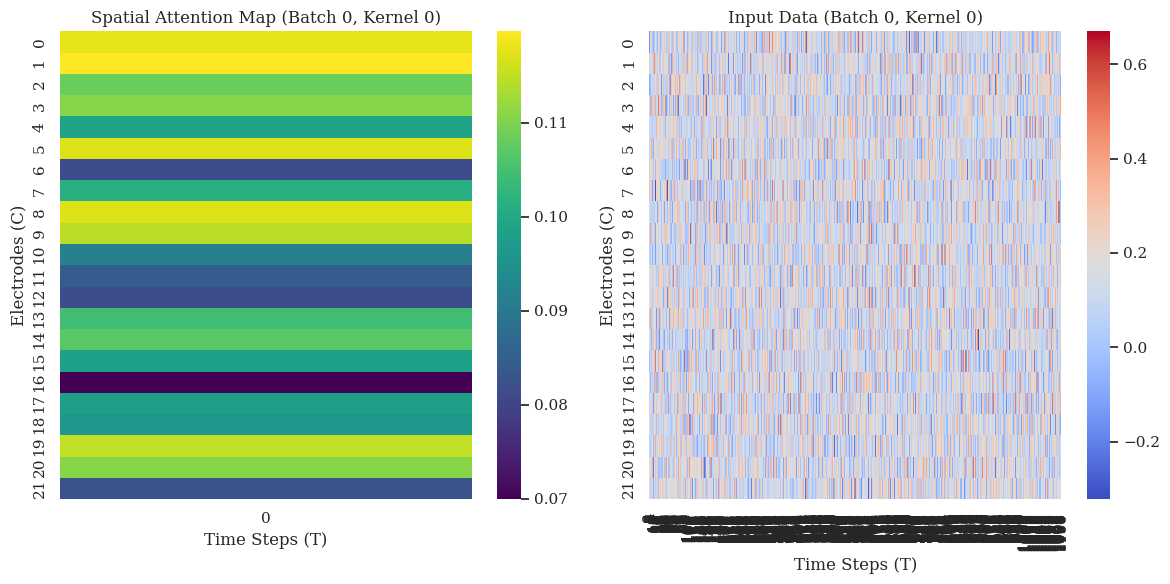

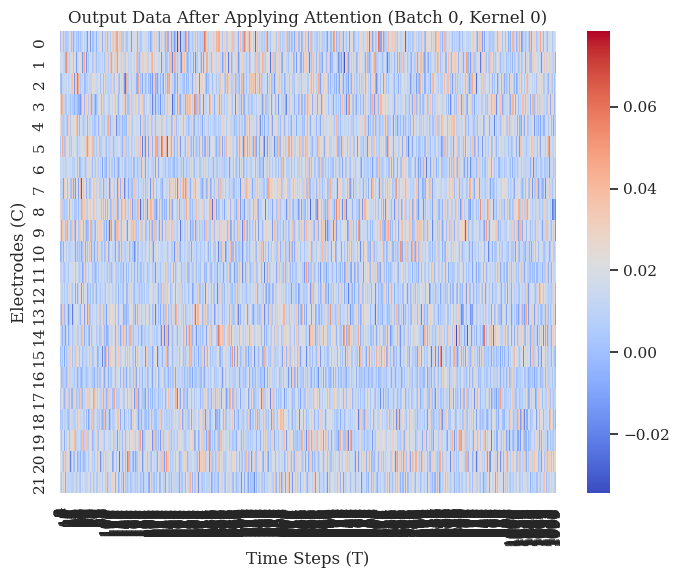

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape
ShallowAttentionNet                      [2, 22, 1125]             [2, 4]                    --                        --
├─Conv2d: 1-1                            [2, 1, 22, 1125]          [2, 10, 22, 1101]         260                       [1, 25]
├─SpatialAttention: 1-2                  [2, 10, 22, 1101]         [2, 10, 22, 1101]         --                        --
│    └─Linear: 2-1                       [2, 10, 44]               [2, 10, 22]               990                       --
├─BatchNorm2d: 1-3                       [2, 10, 22, 1101]         [2, 10, 22, 1101]         20                        --
├─AvgPool2d: 1-4                         [2, 10, 22, 1101]         [2, 10, 22, 55]           --                        [1, 20]
├─Dropout: 1-5                           [2, 12100]                [2, 12100]                --                        --
├─Li

In [250]:
summary(model,input_size=(2, 22, 1125),col_names=["input_size", "output_size", "num_params", "kernel_size"])